# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [5]:
#read csv and create a df for each gender
data = pd.read_csv('weight-height.csv')
male_df =  data[data['Gender']=='Male']
female_df =  data[data['Gender']=='Female']

#print required stats

#list of genders
gender_dfs = {"Male":male_df, "Female":female_df}
#list of fields
fields = ['Height','Weight']

#iterate over each gender, field and get mean and standard dev
for gender_key, gender_df in gender_dfs.items():
    for field in fields:
        print(f"{gender_key} {field} mean: {gender_df[field].mean()}")
        print(f"{gender_key} {field} sd: {np.std(gender_df[field])}")
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621737
Male Height sd: 2.8630758781195427
Male Weight mean: 187.0206206581929
Male Weight sd: 19.779176302396472
Female Height mean: 63.708773603424916
Female Height sd: 2.6960143738807107
Female Weight mean: 135.8600930074687
Female Weight sd: 19.020565463416624


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

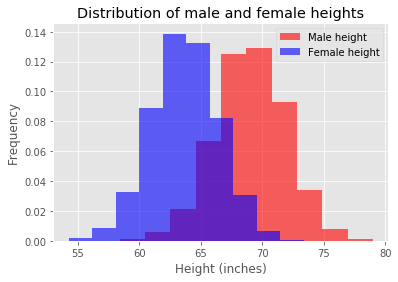

In [13]:
fig = plt.figure(figsize=(6,4))

#use density instead of normed kwarg
plt.hist(male_df['Height'], label='Male height', color='red', bins=10, alpha=0.6, density=True)
plt.hist(female_df['Height'], label = 'Female height', color = 'blue', bins=10, alpha=0.6, density=True)

plt.title("Distribution of male and female heights")
plt.xlabel("Height (inches)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

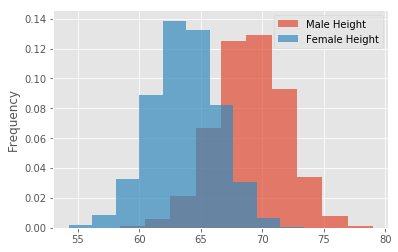

In [5]:
#solution

#### Record your observations - are these inline with your personal observations?
Yes, I would expect that on average females are shorter than males


#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

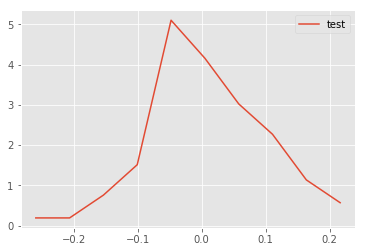

In [16]:
def density(x, bins = 10):
    #return number of bins and bins for a normalized plot
    n, bins = np.histogram(x, bins=bins, density = True)
    #create two arrays of length = num of bins
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    #interpolate through histogram bins
    for k in range(n.size):
        #take the bin values of current and next bin and average them
        #assign to x-array
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        #assign bin value to y-array
        pdfy[k] = n[k]
    
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

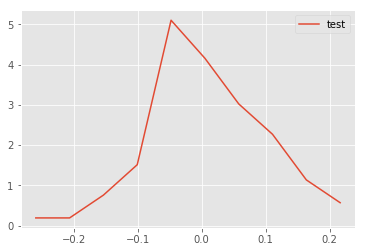

In [7]:
#solution

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

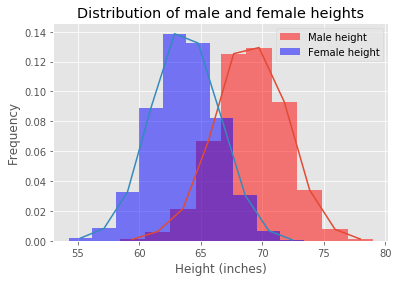

In [19]:
# You code here 
fig = plt.figure(figsize=(6,4))

#use density instead of normed kwarg
plt.hist(male_df['Height'], label='Male height', color='red', bins=10, alpha=0.5, density=True)
plt.hist(female_df['Height'], label = 'Female height', color = 'blue', bins=10, alpha=0.5, density=True)

plt.title("Distribution of male and female heights")
plt.xlabel("Height (inches)")
plt.ylabel("Frequency")
plt.legend()

#add density plots
male_x, male_y = density(male_df['Height'])
female_x, female_y = density(female_df['Height'])
plt.plot(male_x, male_y)
plt.plot(female_x, female_y)

plt.show()

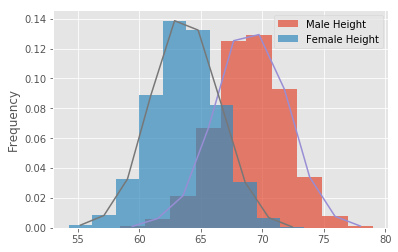

#### Repeat above exerice for male and female weights

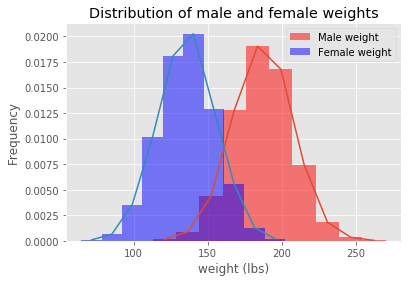

In [20]:
# You code here 
fig = plt.figure(figsize=(6,4))

#use density instead of normed kwarg
plt.hist(male_df['Weight'], label='Male weight', color='red', bins=10, alpha=0.5, density=True)
plt.hist(female_df['Weight'], label = 'Female weight', color = 'blue', bins=10, alpha=0.5, density=True)

plt.title("Distribution of male and female weights")
plt.xlabel("weight (lbs)")
plt.ylabel("Frequency")
plt.legend()

#add density plots
male_x, male_y = density(male_df['Weight'])
female_x, female_y = density(female_df['Weight'])
plt.plot(male_x, male_y)
plt.plot(female_x, female_y)

plt.show()

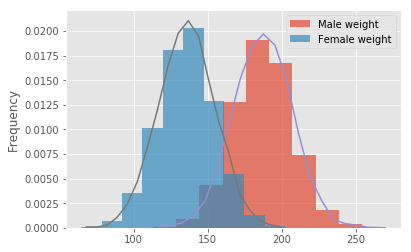

#### Write your observations in the cell below.

#### Record your observations - are these inline with your personal observations?
Yes

#### So whats the takeaway when comparing male and female heights and weights 
On average, females are short and lighter than males with some overlap


#### Repeat Above experiments in seaborn and compare with your results. 

C:\Users\kyleg\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


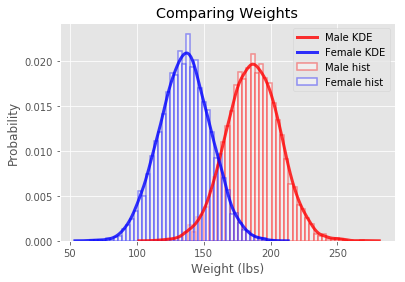

In [26]:
import seaborn as sns
fig = plt.figure(figsize=(6,4))

sns.distplot(male_df['Weight'], 
            hist = True, hist_kws = {'linewidth':1.5,
                                    "edgecolor":'red',
                                    "alpha":0.4,
                                    "color":'white',
                                    'label':"Male hist"},
            kde=True, kde_kws = {'linewidth':3,
                                'color':'red',
                                'alpha':0.8,
                                'label':"Male KDE"})

sns.distplot(female_df['Weight'],
           hist = True, hist_kws = {'linewidth':1.5,
                                   'edgecolor':'blue',
                                   'alpha':0.4,
                                   'color':'white',
                                   'label':'Female hist'},
           kde=True, kde_kws = {'linewidth':3,
                               'color':'blue',
                               'alpha':0.8,
                               'label':"Female KDE"})

plt.title("Comparing Weights")
plt.xlabel("Weight (lbs)")
plt.ylabel("Probability")
plt.show()

C:\Users\kyleg\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


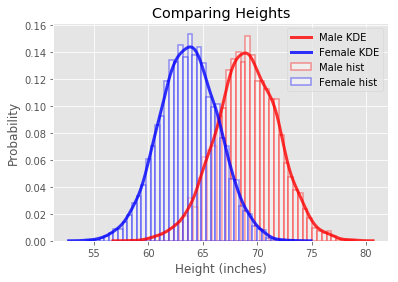

In [27]:
fig = plt.figure(figsize=(6,4))

sns.distplot(male_df['Height'], 
            hist = True, hist_kws = {'linewidth':1.5,
                                    "edgecolor":'red',
                                    "alpha":0.4,
                                    "color":'white',
                                    'label':"Male hist"},
            kde=True, kde_kws = {'linewidth':3,
                                'color':'red',
                                'alpha':0.8,
                                'label':"Male KDE"})

sns.distplot(female_df['Height'],
           hist = True, hist_kws = {'linewidth':1.5,
                                   'edgecolor':'blue',
                                   'alpha':0.4,
                                   'color':'white',
                                   'label':'Female hist'},
           kde=True, kde_kws = {'linewidth':3,
                               'color':'blue',
                               'alpha':0.8,
                               'label':"Female KDE"})

plt.title("Comparing Heights")
plt.xlabel("Height (inches)")
plt.ylabel("Probability")
plt.show()

Text(0.5,1,'Comparing Weights')

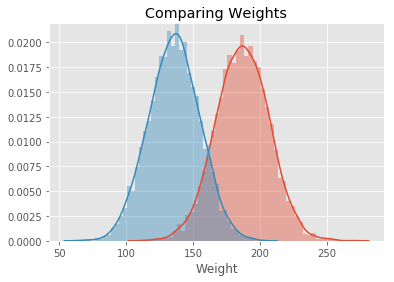

#### Your comments on the two approaches here. 
#### are they similar ? what makes them different if they are ?
They are not very similar. The matplotlib approach requires you to calculate the density function whereas the seaborn approach allows you to specify a kde plot (or could use a fit plot) to graph the density function. However, if you can do the matplotlib function then you are more guaranteed to understand how a density function is contructed

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.